In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pwd

/aiffel


In [11]:
data = pd.read_csv('~/aiffel/data/trip.csv')

In [12]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [13]:
data[data.duplicated()]
data[data['passenger_name'] == 'Sarah Gross']
data[data['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [14]:
data = data.drop_duplicates()

In [15]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [16]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [17]:
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [18]:
data[data['fare_amount'].isna()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,Benjamin Johnson,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,Maria Ibarra,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,Tina Avila,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [19]:
data.dropna(subset=['fare_amount'])

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [20]:
data = data.dropna(subset=['fare_amount'])
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

In [21]:
data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
416       6
4322      6
14500     6
0         6
64       36
Name: passenger_count, Length: 22696, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

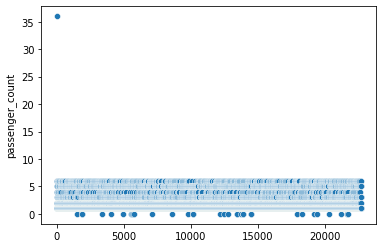

In [22]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [23]:
data = data[data['passenger_count'] <= 6]

In [24]:
len(data[data['passenger_count'] == 0])

33

In [25]:
data = data[data['passenger_count'] != 0]

<AxesSubplot:ylabel='passenger_count'>

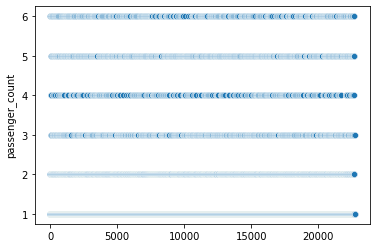

In [26]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

<AxesSubplot:ylabel='trip_distance'>

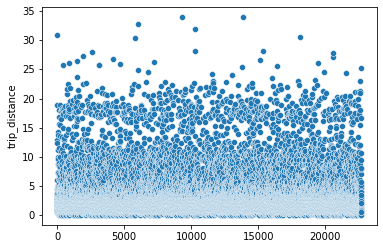

In [27]:
sns.scatterplot(x = data.index, y = data['trip_distance'])

In [28]:
data['trip_distance'].sort_values()

3764      0.00
13064     0.00
5620      0.00
1277      0.00
5632      0.00
         ...  
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, Length: 22662, dtype: float64

In [29]:
len(data[data['trip_distance']>30])/len(data)*100

0.030888712381960993

In [30]:
data[data['trip_distance']>30]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
30,David Burton,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,Credit Card,1,30.83,80.00,18.56,11.52
5794,Tamara Bowen MD,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,Cash,1,30.33,52.00,14.64,5.76
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76
18132,Jose Deleon,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,Debit Card,1,30.50,90.50,19.85,8.16


In [31]:
data[data['trip_distance']==0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.00,0.0


In [32]:
data.sort_values('trip_distance')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
3764,Tiffany Washington DDS,04/28/2017 8:43:59 PM,04/28/2017 8:44:08 PM,Cash,1,0.00,25.00,0.00,0.00
13064,Dylan Olson,10/10/2017 9:53:00 AM,10/10/2017 9:53:00 AM,Cash,1,0.00,2.50,0.00,0.00
5620,Angela Webb,03/07/2017 6:02:37 AM,03/07/2017 6:03:31 AM,Cash,2,0.00,2.50,0.00,0.00
1277,Joseph Aguilar,02/28/2017 5:46:44 AM,02/28/2017 5:46:49 AM,Credit Card,1,0.00,2.50,0.00,0.00
5632,Jacqueline Allison,01/29/2017 8:16:21 PM,01/29/2017 8:16:21 PM,Debit Card,1,0.00,39.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
30,David Burton,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,Credit Card,1,30.83,80.00,18.56,11.52
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


In [33]:
data.sort_values('trip_distance').iloc[150:170]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
9190,Valerie Vasquez,03/31/2017 5:29:19 AM,03/31/2017 5:29:32 AM,Cash,1,0.01,2.5,0.00,0.00
3611,James Chen,11/19/2017 7:17:16 AM,11/19/2017 7:17:19 AM,Cash,1,0.01,52.0,0.00,0.00
5503,Mike Bishop,08/08/2017 11:28:54 PM,08/08/2017 11:29:00 PM,Credit Card,2,0.01,2.5,0.00,0.00
19646,Michael Solomon,12/13/2017 12:19:29 PM,12/13/2017 12:19:39 PM,Credit Card,1,0.01,52.0,17.57,5.76
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.00,0.00
325,Valerie Mullen,01/14/2017 7:04:51 PM,01/14/2017 7:05:01 PM,Cash,2,0.02,2.5,0.00,0.00
14470,Leah Carrillo,09/09/2017 1:29:37 PM,09/09/2017 1:29:57 PM,Credit Card,3,0.02,2.5,0.00,0.00
16829,Jeffrey Jackson,05/02/2017 12:18:59 AM,05/02/2017 12:19:02 AM,Credit Card,1,0.02,2.5,0.00,0.00
13496,Amber Boyd,01/15/2017 5:04:18 AM,01/15/2017 5:04:21 AM,Cash,1,0.02,2.5,0.00,0.00
15348,Michael Ferguson,01/17/2017 1:18:24 PM,01/17/2017 1:18:31 PM,Debit Card,1,0.02,2.5,0.00,0.00


In [34]:
data = data[data['trip_distance']!=0]

In [35]:
data.sort_values('trip_distance')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
2987,Christine Harper,11/24/2017 4:32:18 AM,11/24/2017 4:32:23 AM,Credit Card,1,0.01,2.50,0.00,0.00
19646,Michael Solomon,12/13/2017 12:19:29 PM,12/13/2017 12:19:39 PM,Credit Card,1,0.01,52.00,17.57,5.76
8199,Steven Brooks,05/16/2017 1:33:23 PM,05/16/2017 1:33:37 PM,Cash,1,0.01,52.00,0.00,0.00
5503,Mike Bishop,08/08/2017 11:28:54 PM,08/08/2017 11:29:00 PM,Credit Card,2,0.01,2.50,0.00,0.00
3611,James Chen,11/19/2017 7:17:16 AM,11/19/2017 7:17:19 AM,Cash,1,0.01,52.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
30,David Burton,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,Credit Card,1,30.83,80.00,18.56,11.52
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

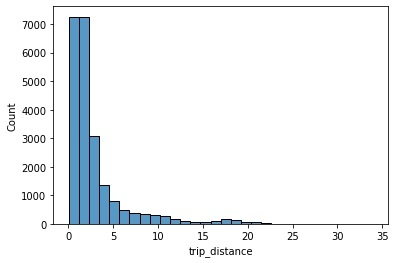

In [36]:
sns.histplot(data['trip_distance'], bins=30, kde=False) 

In [37]:
len(data[data['fare_amount']<0])

13

In [38]:
data[data['fare_amount']<=0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
316,Tiffany Johnson,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,Cash,6,0.12,-2.5,0.0,0.0
1648,Debbie Holmes,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,Credit Card,1,0.04,-2.5,0.0,0.0
4404,Mrs. Tiffany Brown DDS,12/20/2017 4:06:53 PM,12/20/2017 4:47:50 PM,Cash,1,7.06,0.0,0.0,0.0
4425,Bobby Wilson,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,Cash,2,0.06,-3.0,0.0,0.0
5450,Alejandro Williams,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,Debit Card,1,0.25,-3.5,0.0,0.0
5760,Samuel Cooper,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,Debit Card,1,0.02,-2.5,0.0,0.0
8206,Stephanie Summers,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,Credit Card,1,0.41,-3.5,0.0,0.0
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.0,0.0
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.0,0.0
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.0,0.0


In [39]:
data = data[data['fare_amount'] >  0]

In [40]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
14470,Leah Carrillo,09/09/2017 1:29:37 PM,09/09/2017 1:29:57 PM,Credit Card,3,0.02,2.50,0.00,0.00
2987,Christine Harper,11/24/2017 4:32:18 AM,11/24/2017 4:32:23 AM,Credit Card,1,0.01,2.50,0.00,0.00
16351,Nathan Salazar,05/13/2017 5:42:22 PM,05/13/2017 5:42:45 PM,Cash,1,0.02,2.50,0.00,0.00
6702,Yvonne Brooks,08/26/2017 7:33:22 AM,08/26/2017 7:34:18 AM,Debit Card,1,0.10,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


<AxesSubplot:ylabel='fare_amount'>

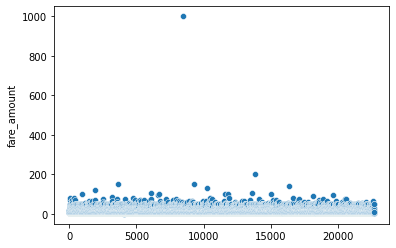

In [41]:
sns.scatterplot(x = data.index, y = data['fare_amount'])

In [42]:
data = data[data['fare_amount'] <  200]

<AxesSubplot:ylabel='fare_amount'>

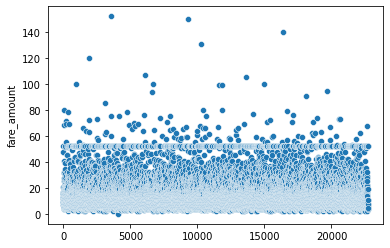

In [43]:
sns.scatterplot(x = data.index, y = data['fare_amount'])

In [44]:
def fare_func(x):
    if x > 150:
        return 150
    else:
        return x
    
data['fare_amount'].apply(fare_func)

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22497, dtype: float64

In [45]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [46]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.0,10.50
16829,Jeffrey Jackson,05/02/2017 12:18:59 AM,05/02/2017 12:19:02 AM,Credit Card,1,0.02,2.50,0.0,0.00
19371,Amanda Taylor,03/24/2017 8:59:58 PM,03/24/2017 9:00:06 PM,Cash,1,0.02,2.50,7.0,0.00
15501,Julie Ferguson,12/29/2017 9:06:34 PM,12/29/2017 9:07:19 PM,Cash,1,4.20,2.50,0.0,0.00
1077,Kyle Johnson,04/12/2017 8:51:58 PM,04/12/2017 8:52:07 PM,Cash,1,2.30,2.50,0.0,0.00
...,...,...,...,...,...,...,...,...,...
1930,Cameron Long,06/16/2017 6:30:08 PM,06/16/2017 7:18:50 PM,Debit Card,2,12.50,120.00,5.0,12.50
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.0,0.00
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.0,16.26
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,150.00,0.0,0.00


<AxesSubplot:ylabel='tip_amount'>

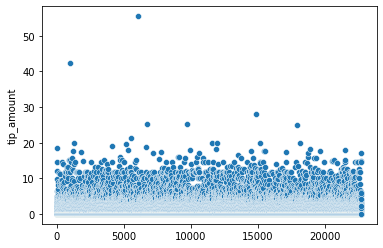

In [47]:
sns.scatterplot(x = data.index, y = data['tip_amount'])

In [48]:
data[data['tip_amount']>30]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
986,Elaine Horton,08/23/2017 6:23:26 PM,08/23/2017 7:18:29 PM,Cash,1,16.70,52.0,42.29,0.00
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.0,55.50,16.26


In [49]:
data = data[data['tip_amount']< 30]

In [50]:
len(data)

22495

In [51]:
data['passenger_name']

0             Pamela Duffy
1          Michelle Foster
2               Tina Combs
3              Anthony Ray
4          Brianna Johnson
               ...        
22696       Austin Johnson
22697     Monique Williams
22698          Drew Graves
22699    Jonathan Copeland
22700      Benjamin Miller
Name: passenger_name, Length: 22495, dtype: object

<AxesSubplot:ylabel='tolls_amount'>

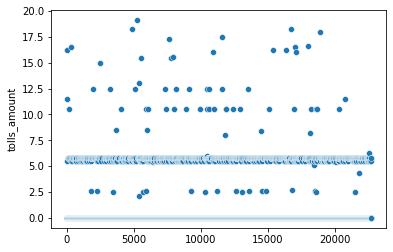

In [52]:
sns.scatterplot(x = data.index, y = data['tolls_amount'])

In [53]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [54]:
data['payment_method'].nunique()

3

In [55]:
data['payment_method'].value_counts()

Cash           11094
Debit Card      5729
Credit Card     5672
Name: payment_method, dtype: int64

In [56]:
data['payment_method'] = data['payment_method'].replace({'Debit Card':'Card','Credit Card':'Card'})

In [57]:
data['payment_method'].value_counts()

Card    11401
Cash    11094
Name: payment_method, dtype: int64

In [58]:
#data['passenger_first_name'] = 
data['passenger_first_name'] = data['passenger_name'].str.split().str[0]

In [59]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22495 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22495 non-null  object 
 1   tpep_pickup_datetime   22495 non-null  object 
 2   tpep_dropoff_datetime  22495 non-null  object 
 3   payment_method         22495 non-null  object 
 4   passenger_count        22495 non-null  int64  
 5   trip_distance          22495 non-null  float64
 6   fare_amount            22495 non-null  float64
 7   tip_amount             22495 non-null  float64
 8   tolls_amount           22495 non-null  float64
 9   passenger_first_name   22495 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


In [61]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [62]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22495 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22495 non-null  object        
 1   tpep_pickup_datetime   22495 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22495 non-null  datetime64[ns]
 3   payment_method         22495 non-null  object        
 4   passenger_count        22495 non-null  int64         
 5   trip_distance          22495 non-null  float64       
 6   fare_amount            22495 non-null  float64       
 7   tip_amount             22495 non-null  float64       
 8   tolls_amount           22495 non-null  float64       
 9   passenger_first_name   22495 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [64]:
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [65]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22495 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22495 non-null  object         
 1   tpep_pickup_datetime   22495 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22495 non-null  datetime64[ns] 
 3   payment_method         22495 non-null  object         
 4   passenger_count        22495 non-null  int64          
 5   trip_distance          22495 non-null  float64        
 6   fare_amount            22495 non-null  float64        
 7   tip_amount             22495 non-null  float64        
 8   tolls_amount           22495 non-null  float64        
 9   passenger_first_name   22495 non-null  object         
 10  travel_time            22495 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.1+ MB


In [68]:
data['travel_time'] = data['travel_time'].dt.total_seconds()

In [69]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,844.0
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,1590.0
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,432.0
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,1815.0
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,1003.0


In [70]:
data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

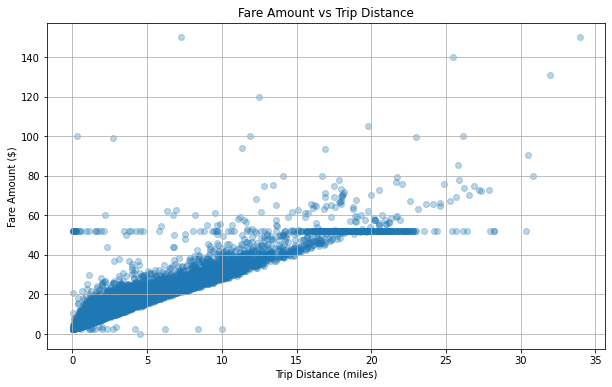

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(data['trip_distance'], data['fare_amount'], alpha=0.3)
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

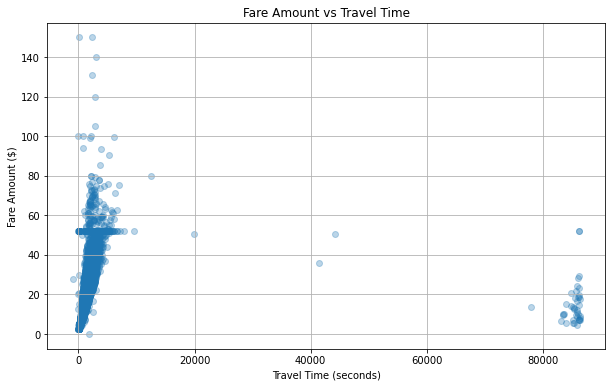

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(data['travel_time'], data['fare_amount'], alpha=0.3)
plt.title('Fare Amount vs Travel Time')
plt.xlabel('Travel Time (seconds)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

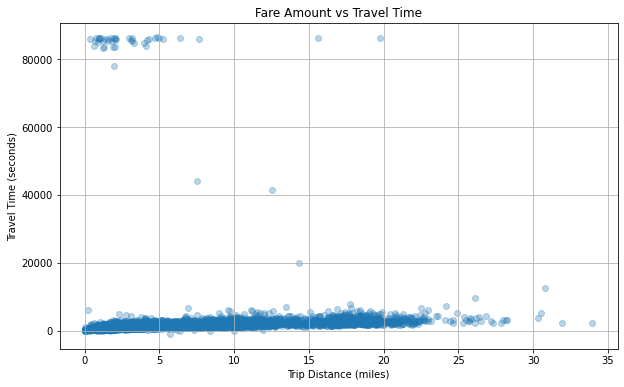

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(data['trip_distance'], data['travel_time'], alpha=0.3)
plt.title('Fare Amount vs Travel Time')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Travel Time (seconds)')
plt.grid(True)
plt.show()

In [75]:
data[data['travel_time'] > 7200] 

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
30,David Burton,2017-11-06 20:30:50,2017-11-07 00:00:00,Card,1,30.83,80.0,18.56,11.52,David,12550.0,110.08
699,Scott Garcia,2017-06-10 21:55:01,2017-06-11 21:45:51,Card,1,1.36,8.5,1.47,0.00,Scott,85850.0,9.97
820,Justin Jenkins,2017-06-20 08:15:18,2017-06-20 10:24:37,Cash,1,17.77,52.0,11.71,5.76,Justin,7759.0,69.47
926,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.00,Michael,86373.0,17.50
1012,James Anderson,2017-12-08 07:17:20,2017-12-09 07:07:22,Cash,1,0.33,4.5,0.00,0.00,James,85802.0,4.50
1201,Carla Allen,2017-11-12 19:52:44,2017-11-13 19:37:35,Card,1,4.14,18.0,3.76,0.00,Carla,85491.0,21.76
1357,Jamie Collins,2017-04-17 21:26:49,2017-04-18 20:46:13,Cash,6,4.09,15.0,0.00,0.00,Jamie,83964.0,15.00
1760,Ronald Kidd,2017-12-28 23:58:24,2017-12-29 23:38:45,Cash,1,1.23,7.0,1.66,0.00,Ronald,85221.0,8.66
4602,Brandon Miller,2017-12-20 08:24:34,2017-12-21 07:39:27,Cash,4,1.26,10.0,0.00,0.00,Brandon,83693.0,10.00
5053,Manuel Haynes,2017-08-07 18:27:53,2017-08-08 00:00:00,Cash,1,14.35,50.5,10.46,0.00,Manuel,19927.0,60.96


In [77]:
data = data[data['travel_time'] <= 7200] 

In [78]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.00,Pamela,844.0,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,Michelle,1590.0,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,Tina,432.0,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,Anthony,1815.0,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,Brianna,1003.0,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,Austin,196.0,4.00
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,Monique,2448.0,72.40
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,Drew,248.0,4.50
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,Jonathan,716.0,12.20


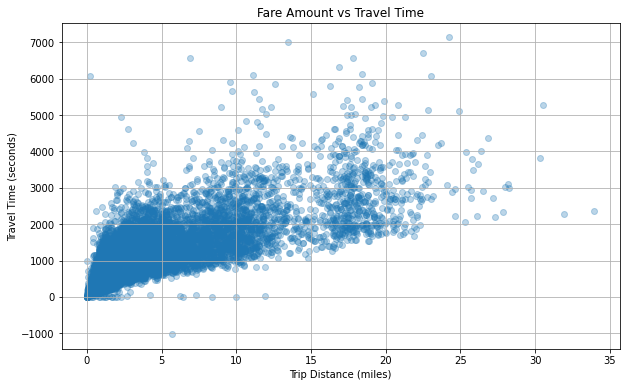

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(data['trip_distance'], data['travel_time'], alpha=0.3)
plt.title('Fare Amount vs Travel Time')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Travel Time (seconds)')
plt.grid(True)
plt.show()